In [28]:
import pandas as pd
import matplotlib.pyplot as plt
# , index_col='date', header=['date','open_ibova','open_oil','open_usd']
df = pd.read_csv('..\Data\ibova_oil_usd.csv')

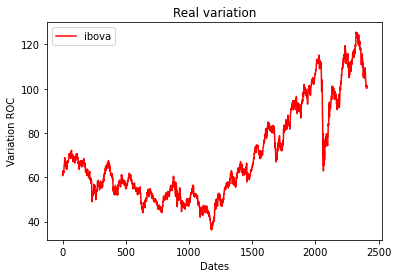

In [29]:
plt.plot(df.open_ibova, color ='r', label='ibova')
# plt.plot(df.open_oil, color ='g', label='oil')
# plt.plot(df.open_usd, color ='b', label='usd')
plt.xlabel("Dates")
plt.ylabel("Variation ROC")
plt.title("Real variation")
plt.legend()
plt.show()

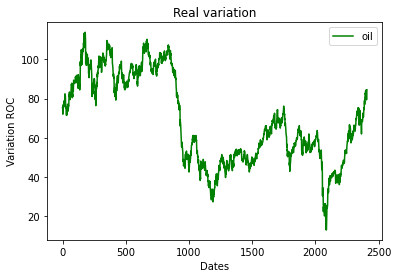

In [30]:
# plt.plot(df.open_ibova, color ='r', label='ibova')
plt.plot(df.open_oil, color ='g', label='oil')
# plt.plot(df.open_usd, color ='b', label='usd')
plt.xlabel("Dates")
plt.ylabel("Variation ROC")
plt.title("Real variation")
plt.legend()
plt.show()

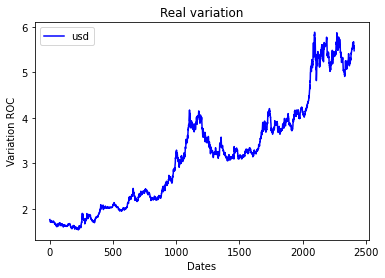

In [31]:
plt.plot(df.open_usd, color ='b', label='usd')
plt.xlabel("Dates")
plt.ylabel("Variation ROC")
plt.title("Real variation")
plt.legend()
plt.show()

In [32]:
df['open_ibova'] = df.open_ibova.rolling(window=10).mean()
df['open_oil'] = df.open_oil.rolling(window=10).mean()
df['open_usd'] = df.open_usd.rolling(window=10).mean()

In [33]:
df = df.dropna()

In [34]:
df.head(20)

,date,open_ibova,open_oil,open_usd
9,2010-07-19,62.102000,75.078000,1.72388
10,2010-07-20,62.216000,75.172000,1.72018
11,2010-07-21,62.564000,75.420000,1.71925
12,2010-07-22,62.911000,75.857000,1.71710
13,2010-07-26,63.324000,76.548000,1.71675
14,2010-07-27,63.631000,76.955000,1.71724
15,2010-07-28,63.954000,77.033000,1.71813
16,2010-07-29,64.329000,77.216000,1.71869
17,2010-08-02,64.964000,77.398000,1.71750
18,2010-08-03,65.471000,77.863000,1.71731


In [35]:
import pandas_ta as ta

df['roc_open_ibova'] = ta.roc(df['open_ibova'], length=None, scalar=None, talib=None, offset=None)
df['roc_open_oil'] = ta.roc(df['open_oil'], length=None, scalar=None, talib=None, offset=None)
df['roc_open_usd'] = ta.roc(df['open_usd'], length=None, scalar=None, talib=None, offset=None)


In [36]:
df = df[['date','roc_open_ibova','roc_open_oil','roc_open_usd']]
df = df.dropna()


In [37]:
df.tail(3)

,date,roc_open_ibova,roc_open_oil,roc_open_usd
2405,2021-11-08,-5.145775,3.310837,1.397980
2406,2021-11-09,-5.205945,2.150646,0.816767
2407,2021-11-10,-5.217123,1.413859,0.539981


In [38]:
separados = {}
price_series = []
lookback = 6
count = -1
dates = df.index

# Roc to IBOVA
prices = list(df.roc_open_ibova.values)
for day in dates:
	count += 1
	if count >= lookback:
		price_series.append(prices[count-lookback:count])

df_lookback_ibova = pd.DataFrame(price_series)

# Roc to OIL
prices = list(df.roc_open_oil.values)
for day in dates:
	count += 1
	if count >= lookback:
		price_series.append(prices[count-lookback:count])

df_lookback_oil = pd.DataFrame(price_series)

# Roc to USD
prices = list(df.roc_open_usd.values)
for day in dates:
	count += 1
	if count >= lookback:
		price_series.append(prices[count-lookback:count])

df_lookback_usd = pd.DataFrame(price_series)

In [54]:
print(f'{df_lookback_ibova.tail(3)}')
print(f'{df_lookback_oil.tail(3)}')
print(f'{df_lookback_usd.tail(3)}')

       ibova_0   ibova_1   ibova_2   ibova_3   ibova_4   ibova_5
2380 -0.705643 -1.438762 -2.093890 -2.946598 -3.644995 -4.502697
2381 -1.438762 -2.093890 -2.946598 -3.644995 -4.502697 -5.145775
2382 -2.093890 -2.946598 -3.644995 -4.502697 -5.145775 -5.205945
         oil_0     oil_1     oil_2     oil_3     oil_4     oil_5
2380 -0.705643 -1.438762 -2.093890 -2.946598 -3.644995 -4.502697
2381 -1.438762 -2.093890 -2.946598 -3.644995 -4.502697 -5.145775
2382 -2.093890 -2.946598 -3.644995 -4.502697 -5.145775 -5.205945
         usd_0     usd_1     usd_2     usd_3     usd_4     usd_5
2380 -0.705643 -1.438762 -2.093890 -2.946598 -3.644995 -4.502697
2381 -1.438762 -2.093890 -2.946598 -3.644995 -4.502697 -5.145775
2382 -2.093890 -2.946598 -3.644995 -4.502697 -5.145775 -5.205945


In [40]:
df_lookback_ibova.columns = ['ibova_0','ibova_1','ibova_2','ibova_3','ibova_4','ibova_5']
df_lookback_oil.columns = ['oil_0','oil_1','oil_2','oil_3','oil_4','oil_5']
df_lookback_usd.columns = ['usd_0','usd_1','usd_2','usd_3','usd_4','usd_5']

In [41]:
df_lookback_ibova = df_lookback_ibova.dropna()
df_lookback_oil = df_lookback_oil.dropna()
df_lookback_usd = df_lookback_usd.dropna()

In [42]:
# df_lookback_ibova = df_lookback_ibova.iloc[:-1 , :]
df_lookback_oil = df_lookback_oil.iloc[:-1 , :]
df_lookback_usd = df_lookback_usd.iloc[:-1 , :]

In [43]:
# df_lookback_ibova['index_ibova'] = range(1, len(df) - 4)
# df_lookback_oil['index_oil'] = range(1, len(df) - 4)
# df_lookback_usd['index_usd'] = range(1, len(df) - 4)

In [44]:
# Dessa forma ele ta add mais de 5 linhas do ibova em seguida
# df_final = pd.concat([df_lookback_ibova,df_lookback_oil,df_lookback_usd], axis=1, ignore_index=True)

df_final = pd.concat([df_lookback_ibova,df_lookback_oil, df_lookback_usd], axis=1, join='outer')

In [55]:
df_final.to_csv('mean10_ibova_oil_usd_ROC3.csv',header=True)

In [46]:
df_final.tail(3)

,ibova_0,ibova_1,ibova_2,ibova_3,ibova_4,ibova_5,oil_0,oil_1,oil_2,oil_3,oil_4,oil_5,usd_0,usd_1,usd_2,usd_3,usd_4,usd_5
2380,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697
2381,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775
2382,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775,-5.205945,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775,-5.205945,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775,-5.205945


In [47]:
df_final.count()

ibova_0    2383
ibova_1    2383
ibova_2    2383
ibova_3    2383
ibova_4    2383
ibova_5    2383
oil_0      2383
oil_1      2383
oil_2      2383
oil_3      2383
oil_4      2383
oil_5      2383
usd_0      2383
usd_1      2383
usd_2      2383
usd_3      2383
usd_4      2383
usd_5      2383
dtype: int64

In [48]:
print(f'{df_lookback_ibova.tail(3)}')
print(f'{df_lookback_oil.tail(3)}')
print(f'{df_lookback_usd.tail(3)}')

       ibova_0   ibova_1   ibova_2   ibova_3   ibova_4   ibova_5
2380 -0.705643 -1.438762 -2.093890 -2.946598 -3.644995 -4.502697
2381 -1.438762 -2.093890 -2.946598 -3.644995 -4.502697 -5.145775
2382 -2.093890 -2.946598 -3.644995 -4.502697 -5.145775 -5.205945
         oil_0     oil_1     oil_2     oil_3     oil_4     oil_5
2380 -0.705643 -1.438762 -2.093890 -2.946598 -3.644995 -4.502697
2381 -1.438762 -2.093890 -2.946598 -3.644995 -4.502697 -5.145775
2382 -2.093890 -2.946598 -3.644995 -4.502697 -5.145775 -5.205945
         usd_0     usd_1     usd_2     usd_3     usd_4     usd_5
2380 -0.705643 -1.438762 -2.093890 -2.946598 -3.644995 -4.502697
2381 -1.438762 -2.093890 -2.946598 -3.644995 -4.502697 -5.145775
2382 -2.093890 -2.946598 -3.644995 -4.502697 -5.145775 -5.205945


In [49]:
print(f'{df_lookback_ibova.count()}')
print(f'{df_lookback_oil.count()}')
print(f'{df_lookback_usd.count()}')

ibova_0    2383
ibova_1    2383
ibova_2    2383
ibova_3    2383
ibova_4    2383
ibova_5    2383
dtype: int64
oil_0    2383
oil_1    2383
oil_2    2383
oil_3    2383
oil_4    2383
oil_5    2383
dtype: int64
usd_0    2383
usd_1    2383
usd_2    2383
usd_3    2383
usd_4    2383
usd_5    2383
dtype: int64


In [50]:
print(f'{df_lookback_ibova.isna().sum()}')
print(f'{df_lookback_oil.isna().sum()}')
print(f'{df_lookback_usd.isna().sum()}')

ibova_0    0
ibova_1    0
ibova_2    0
ibova_3    0
ibova_4    0
ibova_5    0
dtype: int64
oil_0    0
oil_1    0
oil_2    0
oil_3    0
oil_4    0
oil_5    0
dtype: int64
usd_0    0
usd_1    0
usd_2    0
usd_3    0
usd_4    0
usd_5    0
dtype: int64


In [51]:
df_final.head()

,ibova_0,ibova_1,ibova_2,ibova_3,ibova_4,ibova_5,oil_0,oil_1,oil_2,oil_3,oil_4,oil_5,usd_0,usd_1,usd_2,usd_3,usd_4,usd_5
0,6.357283,6.95641,6.935300,6.674510,6.068790,5.415600,6.357283,6.95641,6.935300,6.674510,6.068790,5.415600,6.357283,6.95641,6.935300,6.674510,6.068790,5.415600
1,6.956410,6.93530,6.674510,6.068790,5.415600,4.784691,6.956410,6.93530,6.674510,6.068790,5.415600,4.784691,6.956410,6.93530,6.674510,6.068790,5.415600,4.784691
2,6.935300,6.67451,6.068790,5.415600,4.784691,4.116341,6.935300,6.67451,6.068790,5.415600,4.784691,4.116341,6.935300,6.67451,6.068790,5.415600,4.784691,4.116341
3,6.674510,6.06879,5.415600,4.784691,4.116341,2.846193,6.674510,6.06879,5.415600,4.784691,4.116341,2.846193,6.674510,6.06879,5.415600,4.784691,4.116341,2.846193
4,6.068790,5.41560,4.784691,4.116341,2.846193,1.887861,6.068790,5.41560,4.784691,4.116341,2.846193,1.887861,6.068790,5.41560,4.784691,4.116341,2.846193,1.887861


In [52]:
df_final.tail()

,ibova_0,ibova_1,ibova_2,ibova_3,ibova_4,ibova_5,oil_0,oil_1,oil_2,oil_3,oil_4,oil_5,usd_0,usd_1,usd_2,usd_3,usd_4,usd_5
2378,-0.164195,-0.238950,-0.705643,-1.438762,-2.093890,-2.946598,-0.164195,-0.238950,-0.705643,-1.438762,-2.093890,-2.946598,-0.164195,-0.238950,-0.705643,-1.438762,-2.093890,-2.946598
2379,-0.238950,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995,-0.238950,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995,-0.238950,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995
2380,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697
2381,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775
2382,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775,-5.205945,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775,-5.205945,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775,-5.205945


In [53]:
df.count()

date              2389
roc_open_ibova    2389
roc_open_oil      2389
roc_open_usd      2389
dtype: int64